In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
data = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/Advertising.csv")

In [4]:
data.isnull().sum()

,0
Unnamed: 0,0
TV,0
Radio,0
Newspaper,0
Sales,0


In [5]:
data.dtypes

,0
Unnamed: 0,int64
TV,float64
Radio,float64
Newspaper,float64
Sales,float64


In [6]:
data.corr()["Sales"]

,Sales
Unnamed: 0,-0.051616
TV,0.782224
Radio,0.576223
Newspaper,0.228299
Sales,1.000000


In [7]:
data.drop(["Unnamed: 0"],axis=1)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [8]:
y = data["Sales"]
X = data[["TV","Radio"]]

In [9]:
const = sm.add_constant(X)

In [10]:
model = sm.OLS(y,const)

In [11]:
results = model.fit()

In [12]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Sun, 18 Aug 2024   Prob (F-statistic):           4.83e-98
Time:                        03:46:18   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9211      0.294      9.919      0.0

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [14]:
lr = LinearRegression()

In [15]:
lr.fit(X_train,y_train)

LinearRegression()

In [16]:
print(lr.coef_)

[0.0447283  0.19066726]


In [17]:
print(lr.intercept_)

3.028255250783305


In [18]:
prediction = lr.predict(X_test)

In [19]:
print(prediction)

[16.35747252 20.86299397 21.52505848 10.58719845 22.22459614 13.06070499
 21.09564403  7.47641062 13.62409831 15.15019438  9.12761147  6.62878923
 14.16531076  8.97073929  9.66825463 12.12821691  8.71252199 16.30911498
 10.26684186 18.89010391 19.4519532  13.03925601 12.41182149 21.20994137
  7.88771365  5.80255394 20.7764401  12.02358305  9.1784369   8.59012258
 12.46070487 10.03213267 21.34367738 12.11632301 18.23376459 20.22242395
 14.14999367 20.78067544 11.07322103  4.56335118]


In [22]:
# y_test and y-true values ​​are compared
df = pd.DataFrame({"y_test":y_test,"prediction":prediction})
df

,y_test,prediction
95,16.9,16.357473
15,22.4,20.862994
30,21.4,21.525058
158,7.3,10.587198
128,24.7,22.224596
115,12.6,13.060705
69,22.3,21.095644
170,8.4,7.476411
174,11.5,13.624098
45,14.9,15.150194


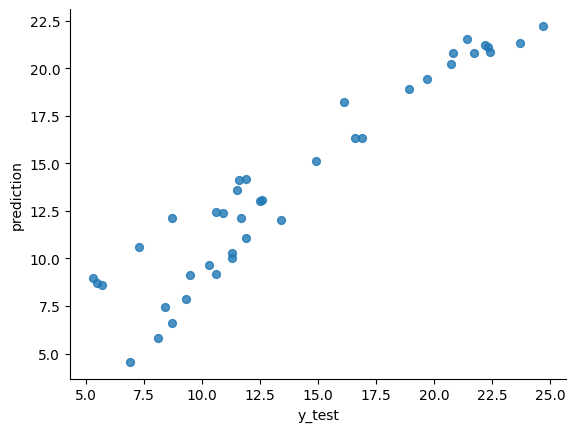

In [27]:
# @title y_test vs prediction

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='y_test', y='prediction', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)